# Project: Investigate TMDb movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>

## Introduction :
**This data set contains information about 10,000 movies collected from The Movie Database (TMDb),information like:**
* Cast: Contains the names of the actors in each movie separeted by pipe (|) characters.
* Genres: Contains the genres of each movie separeted by pipe (|) characters.
* Revenue: Contains the revenue generated by each movie.
* popularity: Contains the popularity that each movie has reached.
> **Totally this dataset consists of 21 columns.**

## Some questions to answer :
* Which genres are most popular from year to year?
* What kinds of properties are associated with movies that have high revenues?
* What is the top voted movies?
* What is the most popular movies?


<a id='wrangling'></a>
# Data Wrangling
## 1 - Loading Data and libraries :

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# Importing the tmdb-movies data :
df= pd.read_csv("tmdb-movies.csv")
df.head()  #test

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


## 2 - Assessing Data :

In [3]:
# Data display
df.head() 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [4]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df.budget.describe()

count    1.086600e+04
mean     1.462570e+07
std      3.091321e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.500000e+07
max      4.250000e+08
Name: budget, dtype: float64

In [7]:
df.revenue.describe()

count    1.086600e+04
mean     3.982332e+07
std      1.170035e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.400000e+07
max      2.781506e+09
Name: revenue, dtype: float64

In [8]:
#duplicated data
df.duplicated().sum()

1

In [9]:
#Null vales
print("\nNull Values:\n",df.isnull().sum()[df.isnull().sum()>0])


Null Values:
 imdb_id                   10
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
genres                    23
production_companies    1030
dtype: int64


In [10]:
# Movies with zero budget.
df[df['budget']==0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/2015,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/2015,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/2015,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/2015,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/2015,569,7.7,2015,0.0,0.000000e+00
88,301875,tt3289728,1.959765,0,2000000,Equals,Kristen Stewart|Nicholas Hoult|Guy Pearce|Jack...,http://equals-the-movie.com/,Drake Doremus,Find your equal.,...,A futuristic love story set in a world where e...,101,Drama|Romance|Science Fiction,Scott Free Productions|Infinite Frameworks Stu...,9/4/2015,135,5.6,2015,0.0,1.839999e+06
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/2015,11,5.4,2015,0.0,0.000000e+00
95,258509,tt2974918,1.841779,0,233755553,Alvin and the Chipmunks: The Road Chip,Jason Lee|Justin Long|Bella Thorne|Matthew Gra...,http://www.foxmovies.com/movies/alvin-and-the-...,Walt Becker,Fast & furry-ous,...,"Through a series of misunderstandings, Alvin, ...",92,Adventure|Animation|Comedy|Family,Regency Enterprises|Fox 2000 Pictures|Sunswept...,12/17/2015,278,5.7,2015,0.0,2.150550e+08
100,326359,tt4007502,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,NaN,Chris Buck|Jennifer Lee,NaN,...,"On Anna's birthday, Elsa and Kristoff are dete...",8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/2015,475,7.0,2015,0.0,0.000000e+00
101,254302,tt0462335,1.661789,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,NaN,Ben Wheatley,Leave the real world behind,...,Dr. Robert Laing is the newest resident of a l...,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,9/26/2015,161,5.4,2015,0.0,0.000000e+00


In [11]:
# Movies with zero runtime.
df[df['runtime']==0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/2015,11,5.4,2015,0.000,0.0
334,361931,tt5065822,0.357654,0,0,Ronaldo,Cristiano Ronaldo,http://www.ronaldothefilm.com,Anthony Wonke,Astonishing. Intimate. Definitive.,...,Filmed over 14 months with unprecedented acces...,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",11/9/2015,80,6.5,2015,0.000,0.0
410,339342,tt2948712,0.097514,0,0,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,NaN,Kenny Gage|Devon Downs,NaN,...,Six young college hopefuls vacationing and par...,0,Horror,NaN,1/1/2015,15,5.6,2015,0.000,0.0
445,353345,tt3800796,0.218528,0,0,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,NaN,Steven R. Monroe,NaN,...,Taking place years after The Haunting of Molly...,0,Horror,WT Canada Productions,10/9/2015,52,5.0,2015,0.000,0.0
486,333653,tt4058368,0.176744,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,NaN,Nancy Savoca,NaN,...,The third installment in V.C. Andrewsâ€™ bests...,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,4/5/2015,11,5.4,2015,0.000,0.0
595,341051,tt2914740,0.028725,0,0,Deep Dark,Sean McGrath|Denise Poirier|Anne Sorce|Tabor H...,http://deepdarkmovie.com,Michael Medaglia,NaN,...,Fantasy - A failed sculptor discovers a strang...,0,Horror,NaN,1/1/2015,11,4.6,2015,0.000,0.0
616,325843,tt4333210,0.026797,0,0,The Outfield,Cameron Dallas|Hamilton Nash Grier|Olivia Stuc...,NaN,Michael Goldfine,NaN,...,The film follows a trio of varsity baseball pl...,0,Drama|Comedy,NaN,11/10/2015,20,6.6,2015,0.000,0.0
1241,296370,tt3024964,0.135376,0,0,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,NaN,NaN,...,DANCE-OFF is a tongue-in-cheek family comedy s...,0,Romance|Music|Comedy,NaN,1/1/2014,18,5.7,2014,0.000,0.0
1289,286372,tt1791681,0.037459,3250000,0,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,http://www.imdb.com/title/tt1791681/,Michael G. Bartlett,No kids allowed,...,A teenage boy discovers the perpetrators of se...,0,Thriller|Horror|Mystery,Tiberius Film,10/20/2014,16,3.4,2014,2993545.915,0.0
1293,286256,tt3134058,0.036904,0,0,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,NaN,Mauro Lima,Original language PORTUGUESE,...,"Biopic of Brazilian singer Tim Maia, from his ...",0,Documentary|Drama|Music,Globo Filmes,10/30/2014,14,6.0,2014,0.000,0.0


## Issues found in "tmdb-movies.csv"
**Quality issues :**
* Invalid id data type (int instead of string).
* Budget has 3 zero values.
* Has 1 duplicated data.
* Invalid release_year data type (int instead of datatime).
* Some useless columns.
* Some movies don't have a cast!! (10790 rows instead of 10866).
* Many zeros in ( runtime, revenue ) columns.
* Adding a new column "Profit" to the dataframe To find out if the movie got a profit or a loss. 



# 3 - Data Cleaning 
> **Copying**- making a copy of the dataframe to start cleaning.


In [12]:
df_c = df.copy()
df_c.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


## Issue - Invalid id data type ( int instead of string ).
> **Define**- Correct invalid data type by converting to string.<br>

**Code :** 


In [13]:
df_c["id"]=df_c["id"].astype(str)

**Test :**

In [14]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null object
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              

## Issue -  Duplicated data.
> **Define**- Delete duplicated rows.<br>

**Code :** 


In [15]:
df_c.drop_duplicates(keep ='first', inplace=True)

**Test :**

In [16]:
df_c.duplicated().sum()

0

## Issue -  Invalid release_year data type (int instead of datetime).
> **Define**- Correct invalid data type by converting to datetime.<br>

**Code :** 

In [17]:
df_c.release_date = pd.to_datetime(df['release_date'])

**Test :**

In [18]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null object
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj      

## Issue - Some useless columns..
> **Define**- Delete useless columns that will not used in the analysis.<br>

**Code :** 

In [19]:
df_c = df_c.drop(columns=['homepage', 'keywords','overview', 'production_companies','tagline'])

**Test :**

In [20]:
df_c.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09


## Issue - Some movies don't have a cast!! (10790 rows instead of 10866).
> **Define**- Delete rows that do not have a Cast!<br>

**Code :** 

In [21]:
df_c=df_c[df_c.cast.notnull()]

**Test :**

In [22]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10789 entries, 0 to 10865
Data columns (total 16 columns):
id                10789 non-null object
imdb_id           10779 non-null object
popularity        10789 non-null float64
budget            10789 non-null int64
revenue           10789 non-null int64
original_title    10789 non-null object
cast              10789 non-null object
director          10751 non-null object
runtime           10789 non-null int64
genres            10767 non-null object
release_date      10789 non-null datetime64[ns]
vote_count        10789 non-null int64
vote_average      10789 non-null float64
release_year      10789 non-null int64
budget_adj        10789 non-null float64
revenue_adj       10789 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(5), object(6)
memory usage: 1.4+ MB


## Issue - Many zeros in ( runtime, revenue ) columns.
> **Define**- Replaceing zeros with NANS and drop them.<br>

**Code :** 

In [23]:
df_c['runtime'] = df_c['runtime'].replace(0, np.NAN)
df_c['budget']  = df_c['budget'].replace(0, np.NAN)

In [24]:
df_c.dropna(subset=['budget', 'runtime'], inplace = True)

**Test :**

In [25]:
df_c[df_c['budget']==0]
df_c[df_c['runtime']==0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [26]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5155 entries, 0 to 10865
Data columns (total 16 columns):
id                5155 non-null object
imdb_id           5154 non-null object
popularity        5155 non-null float64
budget            5155 non-null float64
revenue           5155 non-null int64
original_title    5155 non-null object
cast              5155 non-null object
director          5151 non-null object
runtime           5155 non-null float64
genres            5154 non-null object
release_date      5155 non-null datetime64[ns]
vote_count        5155 non-null int64
vote_average      5155 non-null float64
release_year      5155 non-null int64
budget_adj        5155 non-null float64
revenue_adj       5155 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(3), object(6)
memory usage: 684.6+ KB


In [27]:
df_c.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,5155.000000,5.155000e+03,5.155000e+03,5155.000000,5155.000000,5155.000000,5155.000000,5.155000e+03,5.155000e+03
mean,0.994562,3.081654e+07,8.050247e+07,107.227546,409.668865,6.032182,2001.247915,3.698145e+07,1.024664e+08
std,1.330399,3.892898e+07,1.596506e+08,22.569154,789.140801,0.882887,11.775131,4.198018e+07,1.961156e+08
min,0.001117,1.000000e+00,0.000000e+00,4.000000,10.000000,1.500000,1960.000000,9.210911e-01,0.000000e+00
25%,0.349470,6.000000e+06,0.000000e+00,93.000000,36.000000,5.500000,1996.000000,8.131203e+06,0.000000e+00
50%,0.625753,1.750000e+07,2.110775e+07,103.000000,123.000000,6.100000,2005.000000,2.287867e+07,2.886076e+07
75%,1.157528,4.000000e+07,8.990000e+07,117.000000,403.000000,6.600000,2010.000000,5.019293e+07,1.136794e+08
max,32.985763,4.250000e+08,2.781506e+09,540.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


## -- Adding a new column "Profit" to the dataframe.
> To find out if the movie got a profit or a loss.<br>

**Code :**


In [28]:
df_c["profit"]=df_c["revenue"]-df_c["budget"]

**Test :**

In [29]:
df_c.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000.0,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09,1.363529e+09


In [30]:
# this is Just rearange the columns of the dataframe.
df_c = df_c[['id','imdb_id','popularity','budget','revenue','profit','original_title','cast','director','runtime','genres','release_date','vote_count','vote_average','release_year','budget_adj','revenue_adj']]
df_c.head()

,id,imdb_id,popularity,budget,revenue,profit,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000.0,1513528810,1.363529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000.0,378436354,2.284364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000.0,295238201,1.852382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000.0,2068178225,1.868178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000.0,1506249360,1.316249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,174799923.1,1.385749e+09


<a id='eda'></a>
#  Exploratory Data Analysis
### Research Question 1: Which genres are most popular from year to year?


In [31]:
genre = df['genres'].str.cat(sep = '|')
pds = pd.Series(genre.split('|'))
pds = pds.value_counts(ascending = False)
pds.head(5)

Drama       4761
Comedy      3793
Thriller    2908
Action      2385
Romance     1712
dtype: int64

Text(0.5,0,'Number of movies')

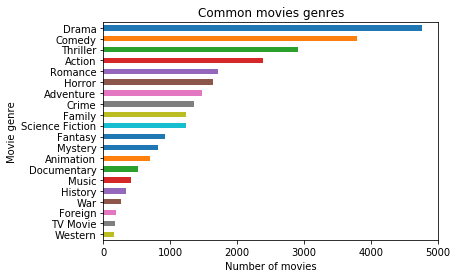

In [32]:
pds.plot(kind='barh').invert_yaxis()
plt.title('Common movies genres')
plt.ylabel('Movie genre')
plt.xlabel('Number of movies')

> **From the previous graph the most common movie genre is the drama one.**

### Research Question 2 : what is the top voted movies?


In [33]:
vote= df_c.sort_values(['vote_average'], ascending = False)

In [34]:
vote['original_title'].head(5)

7948           Stop Making Sense
5986           Guten Tag, RamÃ³n
4178    The Shawshank Redemption
7269               The Godfather
650                     Whiplash
Name: original_title, dtype: object

> **From the previos code the top three voted movie is Stop Making Sense --> Guten Tag, RamÃ³n --> The Shawshank Redemption .**

### Research Question 3 : What is the average runtime of a movie ?


In [35]:
# Statistican information about the dataframe.
df_c.describe()

,popularity,budget,revenue,profit,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,5155.000000,5.155000e+03,5.155000e+03,5.155000e+03,5155.000000,5155.000000,5155.000000,5155.000000,5.155000e+03,5.155000e+03
mean,0.994562,3.081654e+07,8.050247e+07,4.968593e+07,107.227546,409.668865,6.032182,2001.247915,3.698145e+07,1.024664e+08
std,1.330399,3.892898e+07,1.596506e+08,1.352907e+08,22.569154,789.140801,0.882887,11.775131,4.198018e+07,1.961156e+08
min,0.001117,1.000000e+00,0.000000e+00,-4.139124e+08,4.000000,10.000000,1.500000,1960.000000,9.210911e-01,0.000000e+00
25%,0.349470,6.000000e+06,0.000000e+00,-6.602404e+06,93.000000,36.000000,5.500000,1996.000000,8.131203e+06,0.000000e+00
50%,0.625753,1.750000e+07,2.110775e+07,2.600497e+06,103.000000,123.000000,6.100000,2005.000000,2.287867e+07,2.886076e+07
75%,1.157528,4.000000e+07,8.990000e+07,5.299944e+07,117.000000,403.000000,6.600000,2010.000000,5.019293e+07,1.136794e+08
max,32.985763,4.250000e+08,2.781506e+09,2.544506e+09,540.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


>  **--From the statistican info. above The runtime movie average is 107 minutes.**


### Research Question 4 : What is the top 5 movies with the hieghest profit ?


In [36]:
df_c.nlargest(5, ['profit'])['original_title']

1386                          Avatar
3       Star Wars: The Force Awakens
5231                         Titanic
0                     Jurassic World
4                          Furious 7
Name: original_title, dtype: object

> **From the previos code the movie with the hieghest profit is Avatar.**

### Research Question 5 : What is the top 5 movies with the hieghest budget ?


In [37]:
df_c.nlargest(5, ['budget'])['original_title']

2244                              The Warrior's Way
3375    Pirates of the Caribbean: On Stranger Tides
7387       Pirates of the Caribbean: At World's End
14                          Avengers: Age of Ultron
6570                               Superman Returns
Name: original_title, dtype: object

> **From the previos code the movie with the hieghest budget is The Warrior's Way.**

In [38]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5155 entries, 0 to 10865
Data columns (total 17 columns):
id                5155 non-null object
imdb_id           5154 non-null object
popularity        5155 non-null float64
budget            5155 non-null float64
revenue           5155 non-null int64
profit            5155 non-null float64
original_title    5155 non-null object
cast              5155 non-null object
director          5151 non-null object
runtime           5155 non-null float64
genres            5154 non-null object
release_date      5155 non-null datetime64[ns]
vote_count        5155 non-null int64
vote_average      5155 non-null float64
release_year      5155 non-null int64
budget_adj        5155 non-null float64
revenue_adj       5155 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(3), object(6)
memory usage: 724.9+ KB


### Research Question 6: What is the correlation type between the budget  and the revenues ?


Text(0.5,1,'the correlation between budget & revenues')

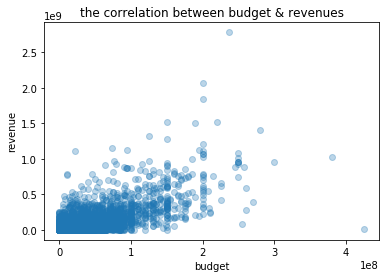

In [39]:
plt.scatter(df['budget'], df['revenue'],alpha=0.3)
plt.xlabel('budget')
plt.ylabel('revenue')
plt.title('the correlation between budget & revenues')

> **From the previous graph there is a positive correlation between the budget and the revenue.**

### Research Question 7: How did the amount of movies changed over time?


Text(0.5,0,'Release year')

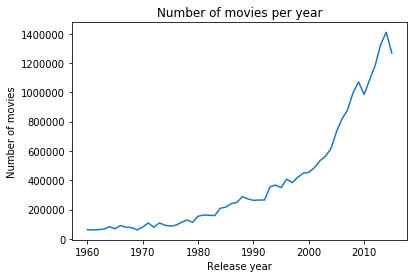

In [40]:
each_year = df.groupby('release_year')['release_year'].sum()
each_year.plot(kind='line')
plt.title('Number of movies per year')
plt.ylabel('Number of movies')
plt.xlabel('Release year')


> **From the previous graph there it's clearly obvious that the number of produced movies increases every year.**



### Histogram of  the quantative  attributes in the dataframe.


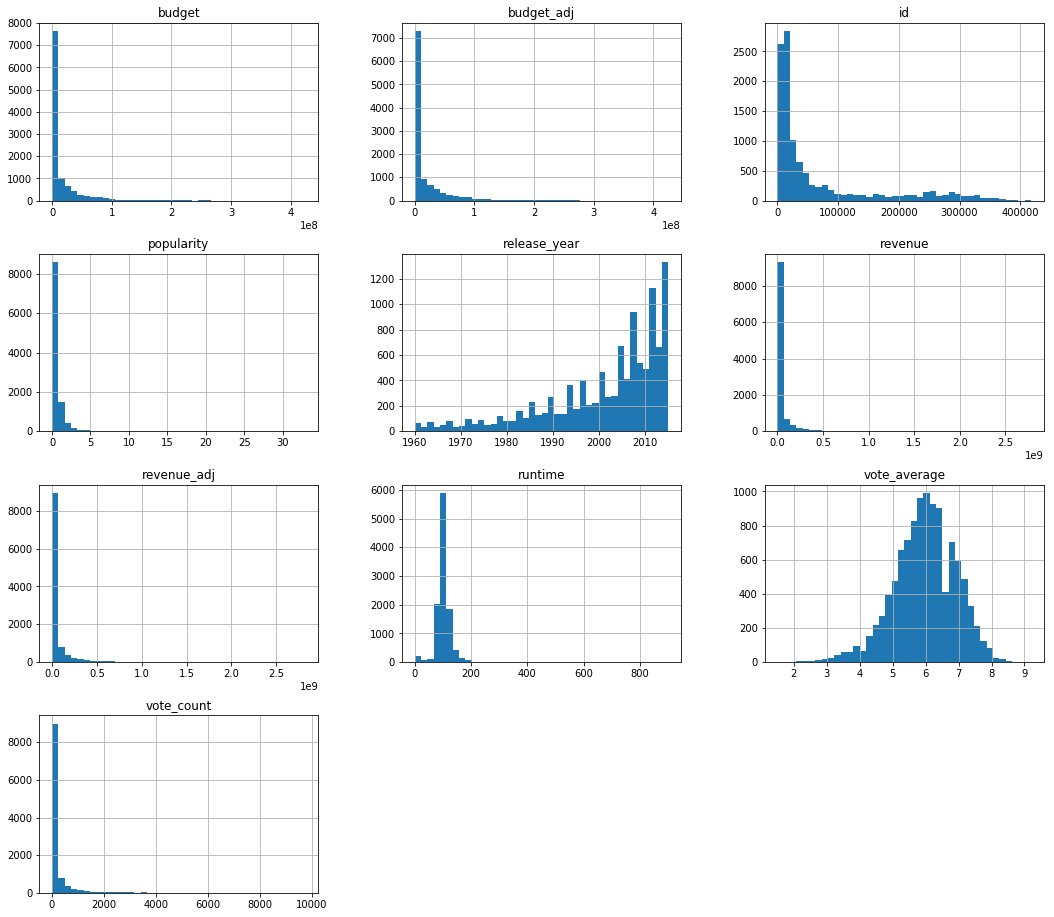

In [41]:
df.hist(bins=40, figsize=(18,16))
plt.show()

<a id='conclusions'></a>
## Conclusions
> * **There is a positive correlation between the budget and the revenue.**<br>
> * **The most common movie genre is the drama one.**<br>
> * **The runtime movie average is 107 minutes.**<br>
> * **The top movie with the hieghest profit is The Warrior's Way.**<br>

## Limitations
> * **The dataset contains columns that will not use in the analysis.( They are uselees ).**<br>
> * **The dataset represent just the years between 2001 ant 2015.**<br>

In [49]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0